In [1]:
from sqlalchemy import create_engine
import psql as creds

engine = create_engine('postgresql://'+creds.PGUSER+':'+creds.PGPASSWORD+\
                       '@'+creds.PGHOST+':5432/'+creds.PGDATABASE)

In [2]:
engine.execute('select * from titles LIMIT 5').fetchall()

[(10001, 'Senior Engineer', datetime.date(1986, 6, 26), datetime.date(9999, 1, 1)),
 (10002, 'Staff', datetime.date(1996, 8, 3), datetime.date(9999, 1, 1)),
 (10003, 'Senior Engineer', datetime.date(1995, 12, 3), datetime.date(9999, 1, 1)),
 (10004, 'Engineer', datetime.date(1986, 12, 1), datetime.date(1995, 12, 1)),
 (10004, 'Senior Engineer', datetime.date(1995, 12, 1), datetime.date(9999, 1, 1))]

In [3]:
# read in sql to dataframe
import pandas as pd

# create sql  query statement 
sql_string ='SELECT t.title, sum(s.salary)/count(s.salary) as average_salary \
FROM titles t \
JOIN salaries s \
ON t.emp_no = s.emp_no \
GROUP BY t.title \
ORDER BY 2 DESC;'

# create connection to engine 
conn = engine.connect()

#read in data with "pandas_read_sql" from database into dataframe
df = pd.read_sql(sql_string ,conn)
df.head()

,title,average_salary
0,Senior Staff,"$58,503.28"
1,Staff,"$58,465.27"
2,Manager,"$51,531.04"
3,Technique Leader,"$48,580.50"
4,Engineer,"$48,539.78"


In [4]:
# Convert salary from string to numeric (float)
df[df.columns[1:]]=df[df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [5]:
df.head()

,title,average_salary
0,Senior Staff,58503.28
1,Staff,58465.27
2,Manager,51531.04
3,Technique Leader,48580.50
4,Engineer,48539.78


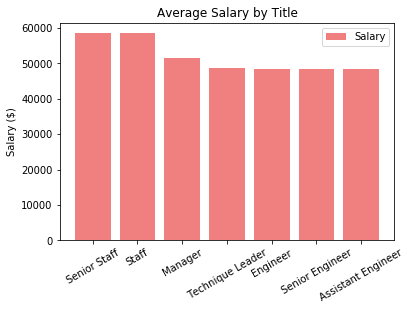

In [7]:
# plot
import matplotlib.pyplot as plt

import plotly.offline as py   # <--- needed for JupyterLab offline chart generation

fig, ax = plt.subplots()
ax.bar(df['title'], df['average_salary'],color='lightCoral', label='Salary')


ax.set_ylabel('Salary ($)')
ax.set_title('Average Salary by Title')
ax.legend()

# rotating labels on the xaxis
plt.xticks(rotation=30)
# y axis
plt.yticks(rotation=0)
plt.show()
